In [1]:
import numpy as ny
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")

In [3]:
# Data Cleaning
df["i4_health"].replace(["No, they have not","Yes, and they tested negative","Not sure"," ","Yes, and they have not received their results from the test yet","Yes, and they tested positive"],[4,2,5,0,3,1],inplace=True)
df['i3_health'].value_counts()
df["i3_health"].replace(["No, I have not","Yes, and I tested negative","Not sure"," ","Yes, and I have not received their results from the test yet","Yes, and I tested positive"],[4,2,5,0,3,1],inplace=True)
df["i6_health"].value_counts()
df["i5_health_1"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i5_health_2"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i5_health_3"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i5_health_4"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i5_health_5"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i5a_health"].replace([" ","No","Yes","Not sure"],["N/A","2","1","99"],inplace=True)
df["i8_health"].replace([" ","No","Yes","Not sure"],["N/A",'2','1','99'],inplace=True)
df["i6_health"].replace(["Always","Frequently","Sometimes","Rarely","Not at all"],['1','2','3',"4","5"],inplace=True)
df["i7b_health"].replace([" ","No","Yes"],["N/A",'2','1'],inplace=True)
df["i9_health"].replace([" ","No","Yes","Not sure"],["N/A",'2','1','99'],inplace=True)
df["i10_health"].replace([" ","Very easy","Somewhat easy","Somewhat difficult","Neither easy nor difficult","Very difficult","Not sure"],["N/A",'1','2','4',"3","5","99"],inplace=True)
df["i11_health"].replace([" ","Very willing","Somewhat willing","Somewhat unwilling","Neither willing nor unwilling","Very unwilling","Not sure"],["N/A",'1','2','4',"3","5","99"],inplace=True)
df["i12_health_1"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_2"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_3"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_4"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_5"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_6"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_7"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_8"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_9"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_10"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_11"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_12"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_13"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_14"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_15"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_16"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_17"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_18"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_19"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i12_health_20"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],["N/A",'1','2','3',"4","5"],inplace=True)
df["i14_health_1"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_2"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_3"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_4"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_5"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_6"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_7"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_8"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_9"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_10"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_96"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_98"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["i14_health_99"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_1"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_2"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_3"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_4"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_5"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_6"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_7"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_8"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_9"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_10"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_11"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_12"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_13"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_98"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["d1_health_99"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
df["gender"].replace([" ","Male","Female"],["N/A",'1','2'],inplace=True)
df["household_size"].replace(["8 or more","Prefer not to say","Don't know"],["8",'10','9'],inplace=True)
df["household_children"].replace(["5 or more","Prefer not to say","0","1","2","3","4"],["6",'8','1',"2",'3','4','5'],inplace=True)
df["employment_status"].replace(["Full time employment",'Part time employment','Full time student','Retired','Unemployed','Not working','Other'],[1,2,3,4,5,6,7],inplace=True)
df.to_csv("cleaned.csv")

In [4]:
# Cleand dataset df
# Raw dataset df_raw
# full ataset df_full
df = pd.read_csv("cleaned.csv")
df_raw = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
df_raw.rename(columns=lambda x: x+'_raw', inplace=True)
df_full = df.join(df_raw)

In [5]:
# Country Column
df_full['country'] = df_full['RecordNo'].str[0:3]
df_full_usa = df_full.loc[df_full['country'] == 'USA']
df_full_can = df_full.loc[df_full['country'] == 'CAN']

Text(0.5, 1.0, 'Avoided going out in general')

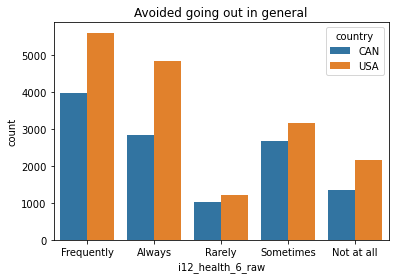

In [6]:
sns.countplot(x="i12_health_6_raw", hue="country", data=df_full).set_title("Avoided going out in general")

In [7]:
i12_crosstab = pd.crosstab(df_full["i12_health_6_raw"], df_full["country"] ,margins = False)
i12_crosstab

country,CAN,USA
i12_health_6_raw,,
Always,2831,4832
Frequently,3970,5604
Not at all,1346,2167
Rarely,1018,1219
Sometimes,2678,3160


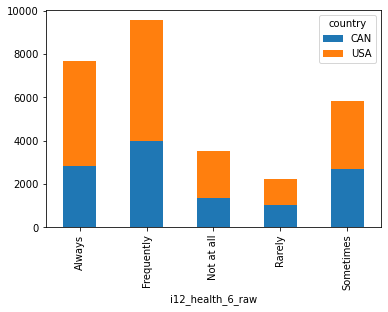

In [8]:
i12_crosstab.plot(kind = 'bar', stacked = True)

In [9]:
i12_crosstab_norm = i12_crosstab.div(i12_crosstab.sum(axis=0), axis=1)
i12_crosstab_norm

country,CAN,USA
i12_health_6_raw,,
Always,0.239044,0.284537
Frequently,0.335219,0.329996
Not at all,0.113654,0.127606
Rarely,0.085958,0.071782
Sometimes,0.226125,0.186079


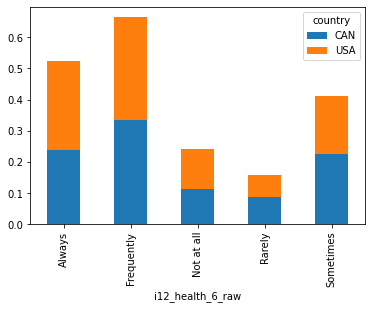

In [10]:
i12_crosstab_norm.plot(kind = 'bar', stacked = True)

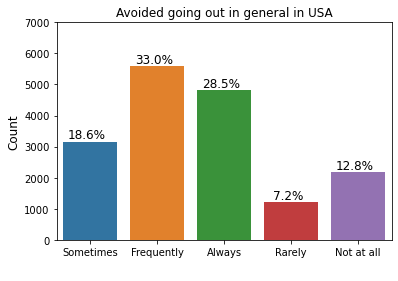

In [11]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha='center', va='bottom')
    
    plt.xlabel(" ", size=12)
    plt.ylabel("Count", size=12)
    plt.ylim(0, 7000)
    plt.title("Avoided going out in general in USA", size=12)
    plt.show()

ax = sns.countplot(x="i12_health_6_raw", data=df_full_usa, order=df_full_usa["i12_health_6"].unique().sort())

without_hue(ax, df_full_usa.i12_health_6)

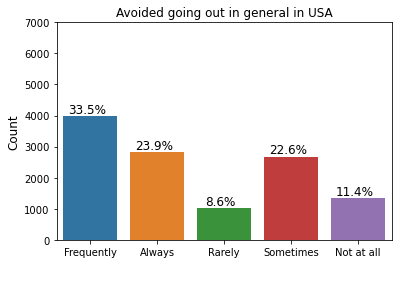

In [12]:
ax = sns.countplot(x="i12_health_6_raw", data=df_full_can, order=df_full_can["i12_health_6"].unique().sort())
without_hue(ax, df_full_can.i12_health_6)

In [ ]:
df.isnull().sum()

In [13]:
check_missing = df.isnull()

In [14]:
check_missing

,i5a_health,i6_health,i7b_health,i8_health
0,True,False,True,True
1,False,False,False,False
2,False,False,False,False
3,True,False,True,True
4,True,False,True,True
5,True,False,True,True
6,True,False,True,True
7,True,False,True,True
8,True,False,True,True
9,True,False,True,True


In [21]:
count_missing = check_missing.apply(lambda x: x.value_counts())

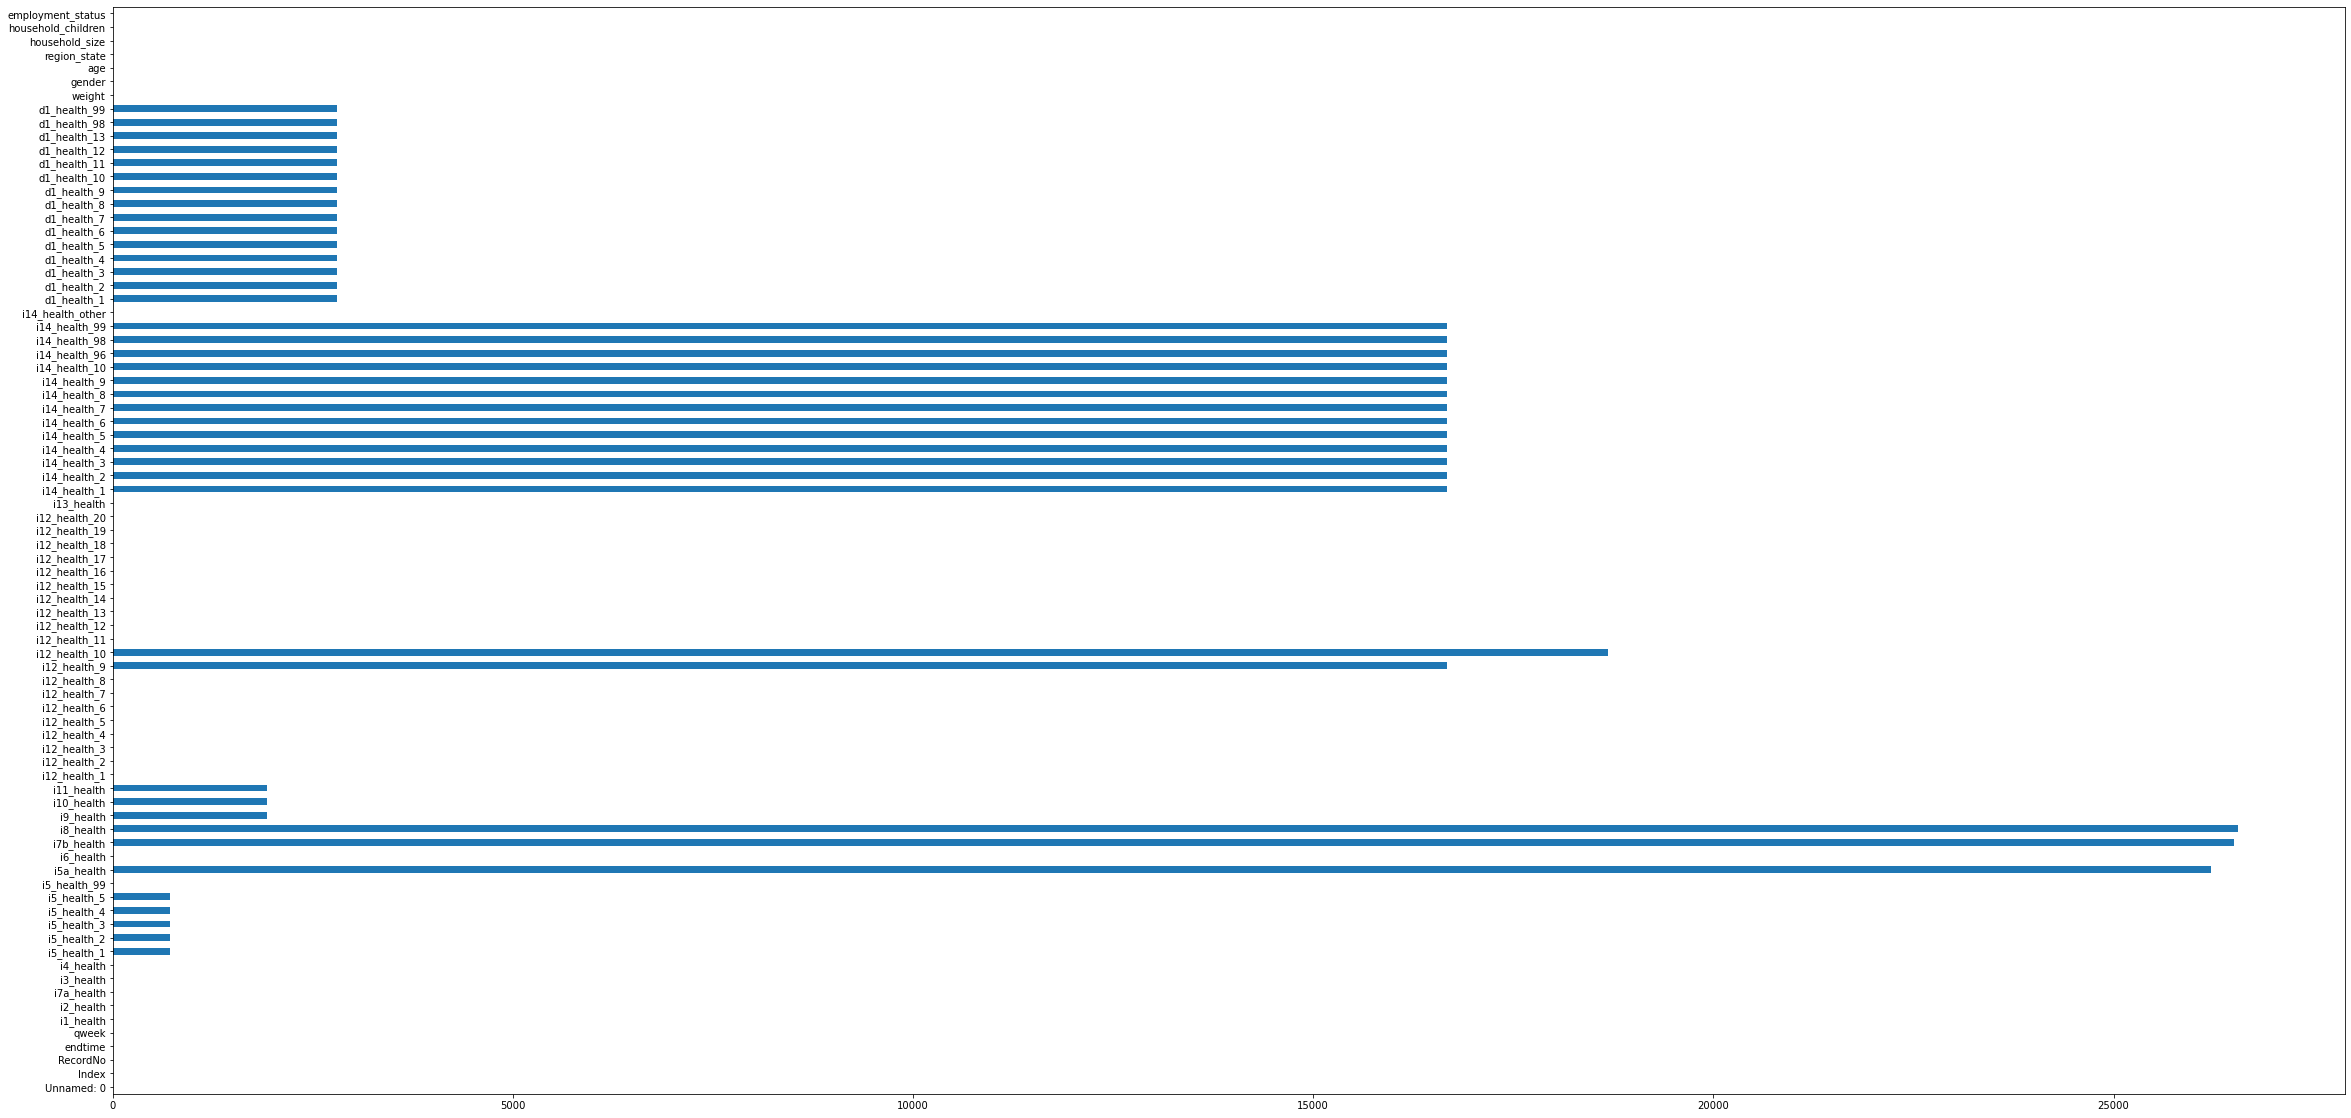

In [22]:
count_missing.iloc[1,:].plot(kind='barh', figsize=(40, 20))